In [1]:
#importing all of the libraries that will be needed
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats

In [2]:
#Read files from the URL into the pandas DataFrame
# make sure to reference where you got the dataswt (CSO - Tourism)
url = "spending.csv"
df = pd.read_csv(url) 

In [3]:
df.head()

,Statistic Label,Year,Month,Residency,Expenditure Type,UNIT,VALUE
0,Expenditure of Overnight Foreign Visitors,2023,April,"Great Britain (England, Scotland & Wales)",Fare,Euro Million,28.3
1,Expenditure of Overnight Foreign Visitors,2023,April,"Great Britain (England, Scotland & Wales)",Prepayments,Euro Million,1.9
2,Expenditure of Overnight Foreign Visitors,2023,April,"Great Britain (England, Scotland & Wales)",Accommodation,Euro Million,27.9
3,Expenditure of Overnight Foreign Visitors,2023,April,"Great Britain (England, Scotland & Wales)",Day-to-Day Expenditure,Euro Million,57.8
4,Expenditure of Overnight Foreign Visitors,2023,April,"Great Britain (England, Scotland & Wales)",All Travel Expenditure,Euro Million,116.0


In [4]:
df.tail()

,Statistic Label,Year,Month,Residency,Expenditure Type,UNIT,VALUE
745,Mean Expenditure of Overnight Foreign Visitors,2024,January,All Residencies,Fare,Euro,259.0
746,Mean Expenditure of Overnight Foreign Visitors,2024,January,All Residencies,Prepayments,Euro,24.0
747,Mean Expenditure of Overnight Foreign Visitors,2024,January,All Residencies,Accommodation,Euro,192.0
748,Mean Expenditure of Overnight Foreign Visitors,2024,January,All Residencies,Day-to-Day Expenditure,Euro,441.0
749,Mean Expenditure of Overnight Foreign Visitors,2024,January,All Residencies,All Travel Expenditure,Euro,916.0


In [5]:
# Drop the 'UNIT' column
df.drop(columns=['UNIT'], inplace=True)

In [6]:
# Filter the DataFrame for the desired date range
df = df[(df['Year'] == 2023) ]
# Now filtered_df contains data only from April 2023 to December 2023


In [7]:
df.shape

(675, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 724
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Statistic Label   675 non-null    object 
 1   Year              675 non-null    int64  
 2   Month             675 non-null    object 
 3   Residency         675 non-null    object 
 4   Expenditure Type  675 non-null    object 
 5   VALUE             675 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 36.9+ KB


In [9]:
df.describe()

,Year,VALUE
count,675.0,675.000000
mean,2023.0,243.466963
std,0.0,418.852886
min,2023.0,0.500000
25%,2023.0,26.450000
50%,2023.0,71.100000
75%,2023.0,276.000000
max,2023.0,3185.000000


In [10]:
df.isnull().sum()

Statistic Label     0
Year                0
Month               0
Residency           0
Expenditure Type    0
VALUE               0
dtype: int64

In [11]:
df.Residency.value_counts()

Residency
Great Britain (England, Scotland & Wales)    135
Other Europe (3)                             135
USA & Canada                                 135
Other Residencies                            135
All Residencies                              135
Name: count, dtype: int64

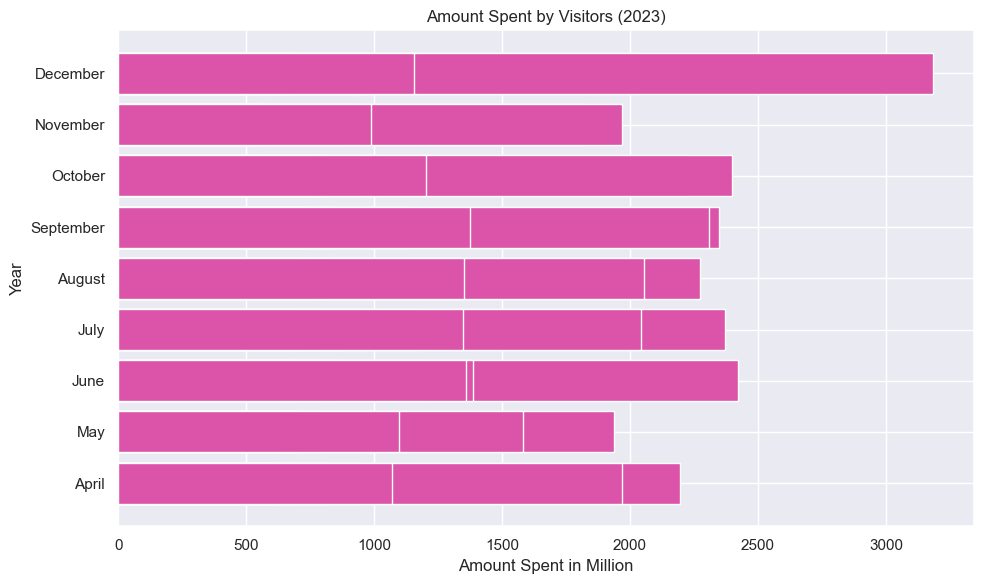

In [24]:
# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(df['Month'], df['VALUE'], color='#db54a9')
plt.title('Amount Spent by Visitors (2023)')
plt.xlabel('Amount Spent in Million')
plt.ylabel('Year')
plt.grid(True)  
plt.tight_layout()

# Show the plot
plt.show()

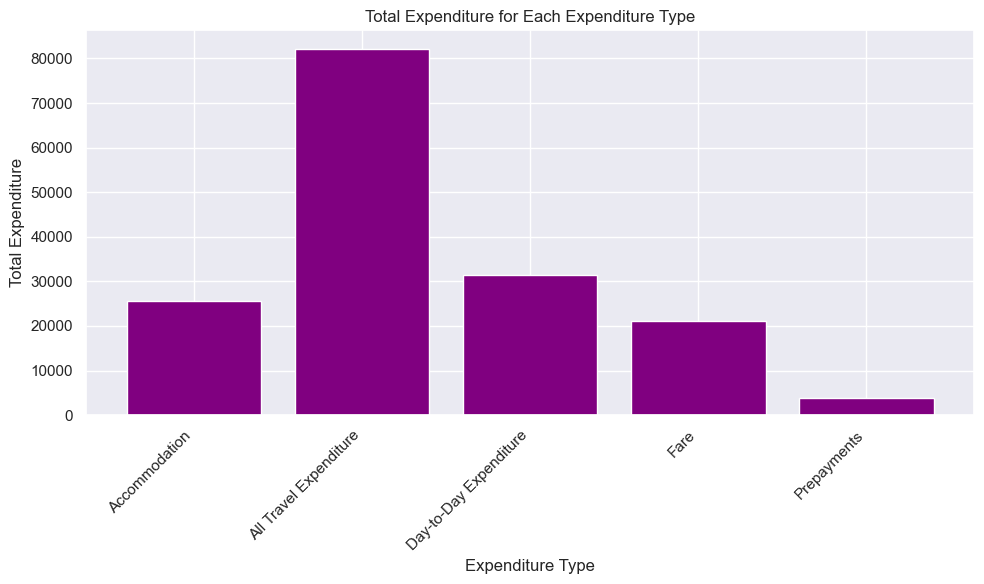

In [17]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'expenditure type' and sum the 'VALUE' column for each group
expenditure_spent = df.groupby('Expenditure Type')['VALUE'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(expenditure_spent.index, expenditure_spent.values, color='purple')
plt.title('Total Expenditure for Each Expenditure Type')
plt.xlabel('Expenditure Type')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


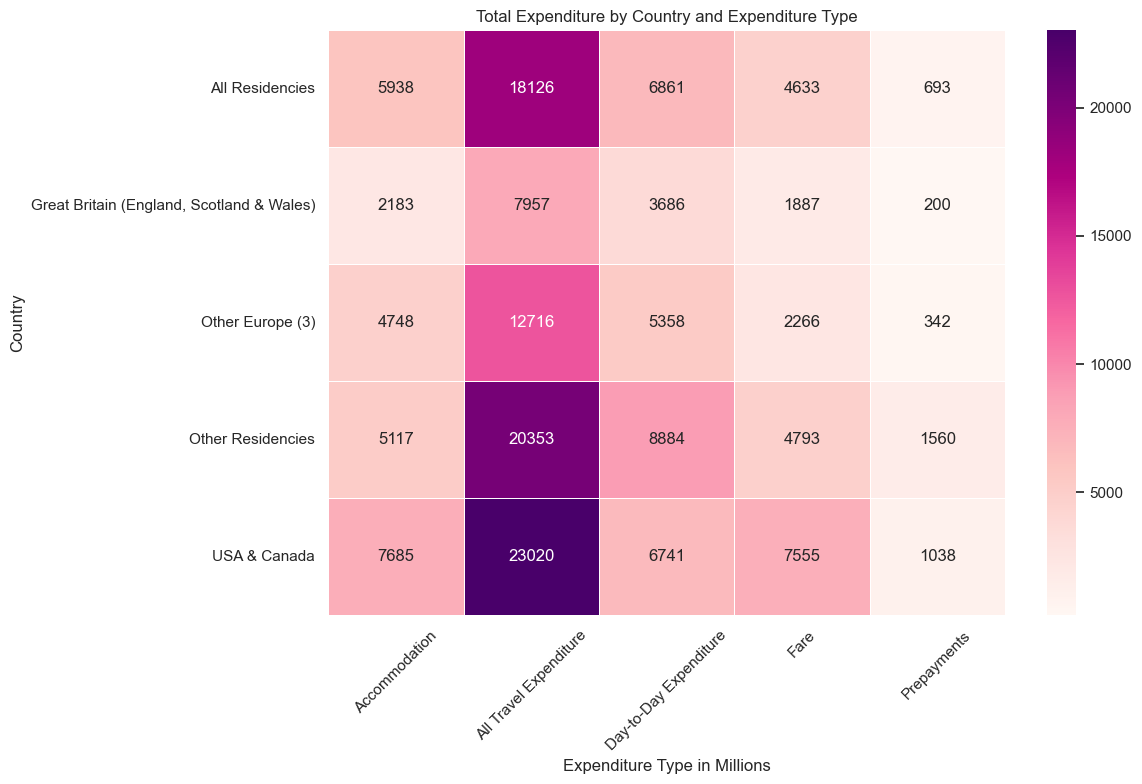

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group the DataFrame by both 'Country' and 'Expenditure Type' and sum the 'VALUE' column for each group
country_expenditure_spent = df.groupby(['Residency', 'Expenditure Type'])['VALUE'].sum()

# Reset the index to make 'Country' and 'Expenditure Type' columns again
country_expenditure_spent = country_expenditure_spent.reset_index()

# Pivot the DataFrame to create a matrix where rows are countries, columns are expenditure types, and values are total expenditure
pivot_df = country_expenditure_spent.pivot(index='Residency', columns='Expenditure Type', values='VALUE')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='RdPu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Total Expenditure by Country and Expenditure Type')
plt.xlabel('Expenditure Type in Millions')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
